I ran the following notebook in a docker container with the following commands:

```
docker pull bethgelab/jupyter-torch:ubuntu-14.04
docker run -it -v `pwd`:/space/ -p 8888:8888 --name keras -w /space/ --rm bethgelab/jupyter-torch:ubuntu-14.04 jupyter notebook --ip=0.0.0.0
```

The following code is adapted from https://github.com/fastforwardlabs/keras-hello-world/blob/master/kerashelloworld.ipynb

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegressionCV

from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.utils import np_utils

/usr/local/lib/python2.7/dist-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)
Using Theano backend.


In [2]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:1314: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


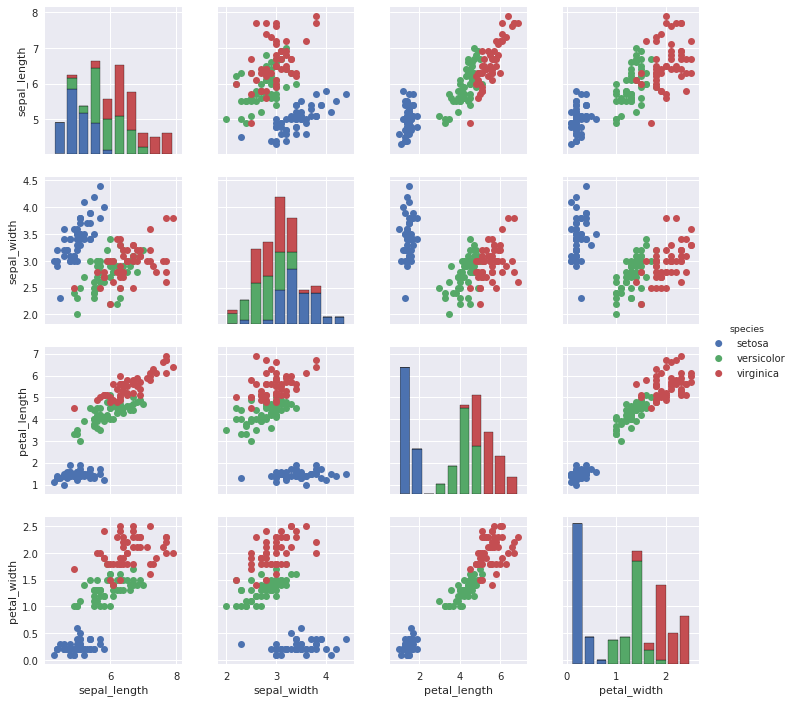

In [3]:
sns.pairplot(iris, hue='species');

In [4]:
X = iris.values[:, :4]
y = iris.values[:, 4]

In [5]:
train_X, test_X, train_y, test_y = train_test_split(X, y, train_size=0.5, random_state=0)

In [6]:
lr = LogisticRegressionCV()
lr.fit(train_X, train_y)

LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

In [7]:
print("Accuracy = {:.2f}".format(lr.score(test_X, test_y)))

Accuracy = 0.83


In [8]:
def one_hot_encode_object_array(arr):
    '''One hot encode a numpy array of objects (e.g. strings)'''
    uniques, ids = np.unique(arr, return_inverse=True)
    return np_utils.to_categorical(ids, len(uniques))

train_y_ohe = one_hot_encode_object_array(train_y)
test_y_ohe = one_hot_encode_object_array(test_y)

In [9]:
from keras.layers.core import Dropout

In [10]:
model = Sequential()

In [11]:
model.add(Dense(16, input_shape=(4,)))
model.add(Activation('sigmoid'))

In [12]:
model.add(Dense(3))
model.add(Dropout(0.01))
model.add(Activation('softmax'))

In [13]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=["accuracy"])
model.fit(train_X, train_y_ohe, nb_epoch=1000, batch_size=1, verbose=0)
loss, accuracy = model.evaluate(test_X, test_y_ohe, verbose=0)
print("Accuracy = {:.2f}".format(accuracy))

Accuracy = 0.97


The following code is adapted from http://pandas.pydata.org/pandas-docs/stable/10min.html

In [14]:
import pandas as pd

In [15]:
s = pd.Series([1,3,5,np.nan,6,8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [16]:
dates = pd.date_range('20160101', periods=6)
dates

DatetimeIndex(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04',
               '2016-01-05', '2016-01-06'],
              dtype='datetime64[ns]', freq='D')

In [17]:
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))
df

,A,B,C,D
2016-01-01,-1.136967,-0.272537,-1.699550,-0.036438
2016-01-02,0.494068,0.766191,0.219035,1.041721
2016-01-03,-0.406403,1.906121,-0.735319,0.639032
2016-01-04,-0.053889,-1.550988,-0.645058,0.954703
2016-01-05,-0.042197,0.031347,1.062449,-1.363550
2016-01-06,0.390268,-0.373011,0.157479,0.797260


In [18]:
df2 = pd.DataFrame({ 'A' : 1.,
                     'B' : pd.Timestamp('20130102'),
                     'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
                     'D' : np.array([3] * 4,dtype='int32'),
                     'E' : pd.Categorical(["a","b","c", "d"]),
                     'F' : 'foo' })
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,a,foo
1,1.0,2013-01-02,1.0,3,b,foo
2,1.0,2013-01-02,1.0,3,c,foo
3,1.0,2013-01-02,1.0,3,d,foo


In [19]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

In [20]:
df.index, df.columns, df.values

(DatetimeIndex(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04',
                '2016-01-05', '2016-01-06'],
               dtype='datetime64[ns]', freq='D'),
 Index([u'A', u'B', u'C', u'D'], dtype='object'),
 array([[-1.13696697, -0.27253684, -1.69955006, -0.03643783],
        [ 0.49406786,  0.76619062,  0.21903545,  1.04172141],
        [-0.40640291,  1.90612117, -0.73531891,  0.63903165],
        [-0.05388871, -1.55098812, -0.64505811,  0.95470316],
        [-0.04219671,  0.0313469 ,  1.06244902, -1.36354968],
        [ 0.39026791, -0.37301102,  0.15747863,  0.7972601 ]]))

In [21]:
df2.index, df2.columns, df2.values

(Int64Index([0, 1, 2, 3], dtype='int64'),
 Index([u'A', u'B', u'C', u'D', u'E', u'F'], dtype='object'),
 array([[1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'a', 'foo'],
        [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'b', 'foo'],
        [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'c', 'foo'],
        [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'd', 'foo']], dtype=object))

In [22]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.125853,0.084520,-0.273494,0.338788
std,0.593956,1.165971,0.958962,0.917884
min,-1.136967,-1.550988,-1.699550,-1.363550
25%,-0.318274,-0.347892,-0.712754,0.132430
50%,-0.048043,-0.120595,-0.243790,0.718146
75%,0.282152,0.582480,0.203646,0.915342
max,0.494068,1.906121,1.062449,1.041721


In [23]:
df2.describe()

,A,C,D
count,4.0,4.0,4.0
mean,1.0,1.0,3.0
std,0.0,0.0,0.0
min,1.0,1.0,3.0
25%,1.0,1.0,3.0
50%,1.0,1.0,3.0
75%,1.0,1.0,3.0
max,1.0,1.0,3.0


In [24]:
df.T

,2016-01-01 00:00:00,2016-01-02 00:00:00,2016-01-03 00:00:00,2016-01-04 00:00:00,2016-01-05 00:00:00,2016-01-06 00:00:00
A,-1.136967,0.494068,-0.406403,-0.053889,-0.042197,0.390268
B,-0.272537,0.766191,1.906121,-1.550988,0.031347,-0.373011
C,-1.699550,0.219035,-0.735319,-0.645058,1.062449,0.157479
D,-0.036438,1.041721,0.639032,0.954703,-1.363550,0.797260


In [25]:
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2016-01-01,-0.036438,-1.699550,-0.272537,-1.136967
2016-01-02,1.041721,0.219035,0.766191,0.494068
2016-01-03,0.639032,-0.735319,1.906121,-0.406403
2016-01-04,0.954703,-0.645058,-1.550988,-0.053889
2016-01-05,-1.363550,1.062449,0.031347,-0.042197
2016-01-06,0.797260,0.157479,-0.373011,0.390268


In [26]:
df.sort_values(by='B')

,A,B,C,D
2016-01-04,-0.053889,-1.550988,-0.645058,0.954703
2016-01-06,0.390268,-0.373011,0.157479,0.797260
2016-01-01,-1.136967,-0.272537,-1.699550,-0.036438
2016-01-05,-0.042197,0.031347,1.062449,-1.363550
2016-01-02,0.494068,0.766191,0.219035,1.041721
2016-01-03,-0.406403,1.906121,-0.735319,0.639032


In [27]:
df['A']

2016-01-01   -1.136967
2016-01-02    0.494068
2016-01-03   -0.406403
2016-01-04   -0.053889
2016-01-05   -0.042197
2016-01-06    0.390268
Freq: D, Name: A, dtype: float64

In [28]:
df[0:3]

,A,B,C,D
2016-01-01,-1.136967,-0.272537,-1.699550,-0.036438
2016-01-02,0.494068,0.766191,0.219035,1.041721
2016-01-03,-0.406403,1.906121,-0.735319,0.639032


In [29]:
df['20160102':'20160104']

,A,B,C,D
2016-01-02,0.494068,0.766191,0.219035,1.041721
2016-01-03,-0.406403,1.906121,-0.735319,0.639032
2016-01-04,-0.053889,-1.550988,-0.645058,0.954703


In [30]:
df.loc[dates[2]]

A   -0.406403
B    1.906121
C   -0.735319
D    0.639032
Name: 2016-01-03 00:00:00, dtype: float64

In [31]:
df.loc[:,['A','D']]

,A,D
2016-01-01,-1.136967,-0.036438
2016-01-02,0.494068,1.041721
2016-01-03,-0.406403,0.639032
2016-01-04,-0.053889,0.954703
2016-01-05,-0.042197,-1.363550
2016-01-06,0.390268,0.797260


In [32]:
df.iloc[3:5,0:2]

,A,B
2016-01-04,-0.053889,-1.550988
2016-01-05,-0.042197,0.031347


In [33]:
df[df.A > 0.5]

,A,B,C,D


In [34]:
df2 = df.copy()
df2['E'] = ['one', 'one','two','three','four','three']
df2

,A,B,C,D,E
2016-01-01,-1.136967,-0.272537,-1.699550,-0.036438,one
2016-01-02,0.494068,0.766191,0.219035,1.041721,one
2016-01-03,-0.406403,1.906121,-0.735319,0.639032,two
2016-01-04,-0.053889,-1.550988,-0.645058,0.954703,three
2016-01-05,-0.042197,0.031347,1.062449,-1.363550,four
2016-01-06,0.390268,-0.373011,0.157479,0.797260,three


In [35]:
df2[df2['E'].isin(['two','four'])]

,A,B,C,D,E
2016-01-03,-0.406403,1.906121,-0.735319,0.639032,two
2016-01-05,-0.042197,0.031347,1.062449,-1.363550,four


In [36]:
df['F'] = pd.Series([1,2,3,4,5,6], index=pd.date_range('20160101', periods=6))
df

,A,B,C,D,F
2016-01-01,-1.136967,-0.272537,-1.699550,-0.036438,1
2016-01-02,0.494068,0.766191,0.219035,1.041721,2
2016-01-03,-0.406403,1.906121,-0.735319,0.639032,3
2016-01-04,-0.053889,-1.550988,-0.645058,0.954703,4
2016-01-05,-0.042197,0.031347,1.062449,-1.363550,5
2016-01-06,0.390268,-0.373011,0.157479,0.797260,6


In [37]:
df.at[dates[0],'A'] = 0.456
df.at[dates[0],'A']

0.45600000000000002

In [38]:
df.iat[0,1] = 0.123
df.iat[0,1]

0.123

In [39]:
df.loc[:,'D'] = np.array([5] * len(df))
df.loc[:,'D']

2016-01-01    5
2016-01-02    5
2016-01-03    5
2016-01-04    5
2016-01-05    5
2016-01-06    5
Freq: D, Name: D, dtype: int64

In [40]:
df.loc[:,'B':'D'] = np.random.randn(len(df), 3)
df.loc[:,'B':'D']

,B,C,D
2016-01-01,0.053856,2.042539,-1.443592
2016-01-02,1.113224,-0.581221,0.440137
2016-01-03,-0.554666,1.356764,0.040392
2016-01-04,0.759589,0.307745,1.090050
2016-01-05,0.291654,-0.065423,-0.303067
2016-01-06,1.330844,-0.197319,-0.603249


In [46]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])
df1.loc[:, 'E'] = np.random.randn(len(df1))
df1

,A,B,C,D,F,E
2016-01-01,0.456000,0.053856,2.042539,-1.443592,1,-0.564485
2016-01-02,0.494068,1.113224,-0.581221,0.440137,2,1.355836
2016-01-03,-0.406403,-0.554666,1.356764,0.040392,3,1.854789
2016-01-04,-0.053889,0.759589,0.307745,1.090050,4,-0.736502


In [49]:
df1.iloc[1,5] = np.nan
df1.dropna(how='any')

,A,B,C,D,F,E
2016-01-01,0.456000,0.053856,2.042539,-1.443592,1,-0.564485
2016-01-03,-0.406403,-0.554666,1.356764,0.040392,3,1.854789
2016-01-04,-0.053889,0.759589,0.307745,1.090050,4,-0.736502


In [50]:
df1.iloc[1,5] = np.nan
df1.fillna(value=5)

,A,B,C,D,F,E
2016-01-01,0.456000,0.053856,2.042539,-1.443592,1,-0.564485
2016-01-02,0.494068,1.113224,-0.581221,0.440137,2,5.000000
2016-01-03,-0.406403,-0.554666,1.356764,0.040392,3,1.854789
2016-01-04,-0.053889,0.759589,0.307745,1.090050,4,-0.736502


In [51]:
pd.isnull(df1)

,A,B,C,D,F,E
2016-01-01,False,False,False,False,False,False
2016-01-02,False,False,False,False,False,True
2016-01-03,False,False,False,False,False,False
2016-01-04,False,False,False,False,False,False


In [54]:
df.median()

A    0.174036
B    0.525622
C    0.121161
D   -0.131337
F    3.500000
dtype: float64

In [55]:
s = pd.Series([1,3,5,np.nan,6,8], index=dates).shift(2)
s

2016-01-01    NaN
2016-01-02    NaN
2016-01-03    1.0
2016-01-04    3.0
2016-01-05    5.0
2016-01-06    NaN
Freq: D, dtype: float64

In [56]:
df.sub(s, axis='index')

,A,B,C,D,F
2016-01-01,NaN,NaN,NaN,NaN,NaN
2016-01-02,NaN,NaN,NaN,NaN,NaN
2016-01-03,-1.406403,-1.554666,0.356764,-0.959608,2.0
2016-01-04,-3.053889,-2.240411,-2.692255,-1.909950,1.0
2016-01-05,-5.042197,-4.708346,-5.065423,-5.303067,0.0
2016-01-06,NaN,NaN,NaN,NaN,NaN


In [57]:
df.apply(np.cumsum)

,A,B,C,D,F
2016-01-01,0.456000,0.053856,2.042539,-1.443592,1
2016-01-02,0.950068,1.167080,1.461318,-1.003455,3
2016-01-03,0.543665,0.612414,2.818082,-0.963063,6
2016-01-04,0.489776,1.372003,3.125827,0.126986,10
2016-01-05,0.447580,1.663657,3.060405,-0.176080,15
2016-01-06,0.837847,2.994502,2.863086,-0.779330,21


In [58]:
a = np.array([[1,2,3], [4,5,6]])
np.cumsum(a,axis=0)      # sum over rows for each of the 3 columns

array([[1, 2, 3],
       [5, 7, 9]])

In [59]:
np.cumsum(a,axis=1)      # sum over columns for each of the 2 rows

array([[ 1,  3,  6],
       [ 4,  9, 15]])

In [61]:
df.apply(lambda x: (x.max(),  x.min()))

A    (0.494067859625, -0.40640291206)
B      (1.33084413537, -0.5546659489)
C    (2.04253906342, -0.581220855172)
D     (1.09004968927, -1.44359158746)
F                          (6.0, 1.0)
dtype: object

In [62]:
s = pd.Series(np.random.randint(0, 7, size=10))
s.value_counts()

6    3
5    3
2    3
3    1
dtype: int64

In [63]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

In [66]:
s.str.capitalize()

0       A
1       B
2       C
3    Aaba
4    Baca
5     NaN
6    Caba
7     Dog
8     Cat
dtype: object

In [69]:
s.str.cat()

'ABCAabaBacaCABAdogcat'

In [74]:
df = pd.DataFrame(np.random.randn(10, 4))
pieces = [df[:3], df[3:7], df[7:]]
pieces[0]

,0,1,2,3
0,0.218417,0.917121,1.234074,-0.463954
1,0.422735,0.002572,-1.162694,-0.249219
2,1.273045,1.586298,1.472953,1.535561


In [73]:
pd.concat(pieces)

,0,1,2,3
0,2.613214,1.681839,1.255071,-2.121918
1,1.647214,-0.833420,-1.580414,0.493808
2,-1.474607,-1.343803,1.047486,0.986812
3,-0.716787,-0.469683,-0.811176,-0.587343
4,0.773656,0.217064,0.524129,0.151063
5,1.703868,0.216246,0.246557,1.277253
6,-0.262090,-0.426055,0.529044,0.105978
7,-0.023704,0.546566,-2.073256,-2.050233
8,-0.305302,-1.947206,0.060078,-0.184900
9,0.941640,-1.008753,-0.341224,-0.317293


In [75]:
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


In [79]:
left = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,bar,2,5


In [82]:
left = pd.DataFrame({'key': ['foo', 'bar', 'foo'], 'lval': [1, 2, 3]})
right = pd.DataFrame({'key': ['foo', 'bar', 'foo'], 'rval': [4, 5, 6]})
joined = pd.merge(left, right, on='key')
joined

,key,lval,rval
0,foo,1,4
1,foo,1,6
2,foo,3,4
3,foo,3,6
4,bar,2,5


In [97]:
joined[joined.key == 'foo'].lval.sum()

8

In [98]:
joined.groupby(by='key').sum()

,lval,rval
key,,
bar,2,5
foo,8,20


In [99]:
df = pd.DataFrame(np.random.randn(8, 4), columns=['A','B','C','D'])
s = df.iloc[3]
df.append(s, ignore_index=True)

,A,B,C,D
0,-0.410943,-1.410229,0.033184,-0.848141
1,0.987110,-0.979602,-0.334608,1.065433
2,0.638112,1.067189,0.007609,-0.194090
3,-0.504253,-0.902220,-0.614570,-0.658536
4,-0.551810,-1.210882,-0.223416,-1.588105
5,-0.062361,1.181061,-1.266082,-0.424910
6,-0.339624,0.655922,0.403478,-0.901521
7,0.876723,-2.332193,1.228900,-0.264767
8,-0.504253,-0.902220,-0.614570,-0.658536


In [100]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                           'foo', 'bar', 'foo', 'foo'],
                    'B' : ['one', 'one', 'two', 'three',
                           'two', 'two', 'one', 'three'],
                    'C' : np.random.randn(8),
                    'D' : np.random.randn(8)})

In [101]:
df.groupby(['A','B']).sum()

C         D
A   B                        
bar one   -0.471127 -2.675896
    three  0.574239 -1.081715
    two    1.860670 -1.094121
foo one   -1.456996  0.795739
    three -0.185038 -0.699291
    two   -1.706834 -2.471272

In [110]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz',
                       'foo', 'foo', 'qux', 'qux'],
                      ['one', 'two'] * 4]))
tuples

[('bar', 'one'),
 ('bar', 'two'),
 ('baz', 'one'),
 ('baz', 'two'),
 ('foo', 'one'),
 ('foo', 'two'),
 ('qux', 'one'),
 ('qux', 'two')]

In [132]:
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
index

MultiIndex(levels=[[u'bar', u'baz', u'foo', u'qux'], [u'one', u'two']],
           labels=[[0, 0, 1, 1, 2, 2, 3, 3], [0, 1, 0, 1, 0, 1, 0, 1]],
           names=[u'first', u'second'])

In [133]:
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])
df

A         B
first second                    
bar   one     2.567009 -1.840751
      two     0.924829  0.252550
baz   one    -1.397207  0.223533
      two     0.679679 -0.695932
foo   one     0.222225  1.230444
      two     0.096678  0.425840
qux   one     2.961353 -2.059968
      two     1.735757 -0.960439

In [145]:
df.loc['foo', 'one']

A    0.222225
B    1.230444
Name: (foo, one), dtype: float64

In [146]:
df.loc['foo', :].A

second
one    0.222225
two    0.096678
Name: A, dtype: float64

In [121]:
df2 = df[:4]
stacked = df2.stack()

In [122]:
stacked.unstack()

A         B
first second                    
bar   one     1.421830  0.679563
      two    -0.086188  0.307691
baz   one    -0.653327 -1.823688
      two    -0.801347 -0.254779

In [125]:
stacked.unstack(0)

first          bar       baz
second                      
one    A  1.421830 -0.653327
       B  0.679563 -1.823688
two    A -0.086188 -0.801347
       B  0.307691 -0.254779

In [126]:
stacked.unstack(1)

second        one       two
first                      
bar   A  1.421830 -0.086188
      B  0.679563  0.307691
baz   A -0.653327 -0.801347
      B -1.823688 -0.254779

In [127]:
stacked.unstack(2)

A         B
first second                    
bar   one     1.421830  0.679563
      two    -0.086188  0.307691
baz   one    -0.653327 -1.823688
      two    -0.801347 -0.254779

In [131]:
df = pd.DataFrame({'A' : ['one', 'one', 'two', 'three'] * 3,
                  'B' : ['A', 'B', 'C'] * 4,
                  'C' : ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                  'D' : np.random.randn(12),
                  'E' : np.random.randn(12)})
df

,A,B,C,D,E
0,one,A,foo,0.559083,1.564149
1,one,B,foo,-1.900787,-0.970990
2,two,C,foo,-0.011254,-0.373531
3,three,A,bar,0.692551,1.027105
4,one,B,bar,-0.976807,-1.079142
5,one,C,bar,-1.205903,0.783043
6,two,A,foo,1.370368,-1.761060
7,three,B,foo,-2.284751,-0.301708
8,one,C,foo,0.872442,-0.367751
9,one,A,bar,-1.645502,1.095779


In [130]:
pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])

C             bar       foo
A     B                    
one   A  1.210234  0.245380
      B -1.289302  0.046982
      C  0.347698 -2.102344
three A  0.035819       NaN
      B       NaN -0.700310
      C  0.208245       NaN
two   A       NaN -0.512199
      B  0.116116       NaN
      C       NaN -0.293263

In [147]:
df = pd.DataFrame(data={'Province' : ['ON','QC','BC','AL','AL','MN','ON'],
                         'City' : ['Toronto','Montreal','Vancouver','Calgary','Edmonton','Winnipeg','Windsor'],
                         'Sales' : [13,6,16,8,4,3,1]})
df

,City,Province,Sales
0,Toronto,ON,13
1,Montreal,QC,6
2,Vancouver,BC,16
3,Calgary,AL,8
4,Edmonton,AL,4
5,Winnipeg,MN,3
6,Windsor,ON,1


In [148]:
table = pd.pivot_table(df,values=['Sales'],index=['Province'],columns=['City'],aggfunc=np.sum,margins=True)
table

Sales                                                           
City     Calgary Edmonton Montreal Toronto Vancouver Windsor Winnipeg   All
Province                                                                   
AL           8.0      4.0      NaN     NaN       NaN     NaN      NaN  12.0
BC           NaN      NaN      NaN     NaN      16.0     NaN      NaN  16.0
MN           NaN      NaN      NaN     NaN       NaN     NaN      3.0   3.0
ON           NaN      NaN      NaN    13.0       NaN     1.0      NaN  14.0
QC           NaN      NaN      6.0     NaN       NaN     NaN      NaN   6.0
All          8.0      4.0      6.0    13.0      16.0     1.0      3.0  51.0

In [149]:
table.stack('City')

Sales
Province City            
AL       All         12.0
         Calgary      8.0
         Edmonton     4.0
BC       All         16.0
         Vancouver   16.0
MN       All          3.0
         Winnipeg     3.0
ON       All         14.0
         Toronto     13.0
         Windsor      1.0
QC       All          6.0
         Montreal     6.0
All      All         51.0
         Calgary      8.0
         Edmonton     4.0
         Montreal     6.0
         Toronto     13.0
         Vancouver   16.0
         Windsor      1.0
         Winnipeg     3.0

In [157]:
rng = pd.date_range('1/1/2016', periods=100, freq='S')
rng[50]

Timestamp('2016-01-01 00:00:50', offset='S')

In [158]:
len(rng)

100

In [161]:
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)
ts.head()

2016-01-01 00:00:00    248
2016-01-01 00:00:01    309
2016-01-01 00:00:02    345
2016-01-01 00:00:03    391
2016-01-01 00:00:04    277
Freq: S, dtype: int64

In [165]:
ts5 = ts.resample('5Min')

In [166]:
ts5.count()

2016-01-01    100
Freq: 5T, dtype: int64

In [167]:
ts5.median()

2016-01-01    316
Freq: 5T, dtype: int64

In [168]:
ts.asfreq('10T')

2016-01-01    248
Freq: 10T, dtype: int64

In [169]:
df = pd.DataFrame({"id":[1,2,3,4,5,6], "raw_grade":['a', 'b', 'b', 'a', 'a', 'e']})
df

,id,raw_grade
0,1,a
1,2,b
2,3,b
3,4,a
4,5,a
5,6,e


In [170]:
df["grade"] = df["raw_grade"].astype("category")
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): [a, b, e]

In [172]:
df["grade"].cat.categories = ["good", "normal", "bad"]
df

,id,raw_grade,grade
0,1,a,good
1,2,b,normal
2,3,b,normal
3,4,a,good
4,5,a,good
5,6,e,bad


In [173]:
df.groupby("grade").size()

grade
good      3
normal    2
bad       1
dtype: int64

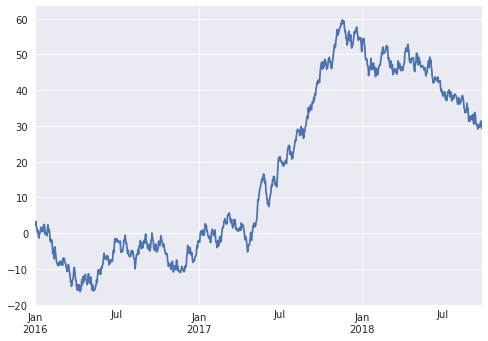

In [180]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2016', periods=1000))
ts = ts.cumsum()
ts.plot()

In [181]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,
                   columns=['A', 'B', 'C', 'D'])

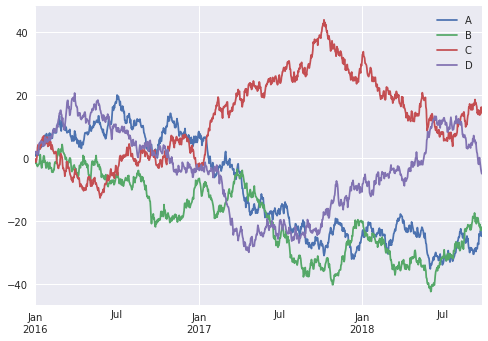

In [182]:
df = df.cumsum()
plt.figure(); df.plot(); plt.legend(loc='best')

In [183]:
df.to_csv('/tmp/foo.csv')

In [184]:
pd.read_csv('/tmp/foo.csv')

,Unnamed: 0,A,B,C,D
0,2016-01-01,0.879918,-1.656850,-0.389814,1.451233
1,2016-01-02,0.610241,-1.436286,-1.353450,2.002346
2,2016-01-03,1.375007,-1.357589,-1.103680,1.942436
3,2016-01-04,1.546098,-2.143558,-0.393686,2.008952
4,2016-01-05,1.064019,-2.465824,0.906274,1.220748
5,2016-01-06,0.829778,-2.719052,3.251619,1.032532
6,2016-01-07,0.828033,-2.167775,4.141083,1.716851
7,2016-01-08,1.082291,-2.119527,3.257982,2.340532
8,2016-01-09,3.111727,-2.092990,3.600164,3.783358
9,2016-01-10,3.225132,-1.686792,3.161773,4.696843


In [185]:
 df.to_hdf('/tmp/foo.h5','df')

ImportError: HDFStore requires PyTables, "No module named tables" problem importing